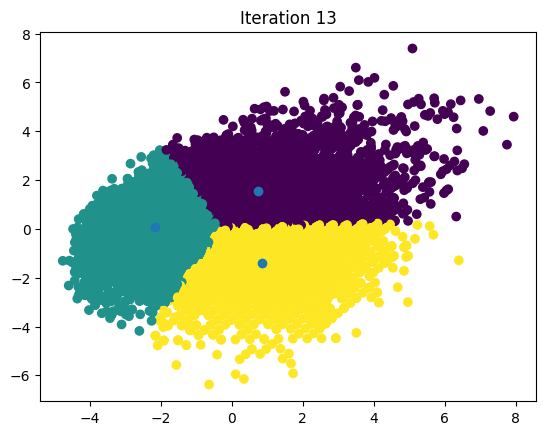

In [39]:
import pandas as pd
import numpy as np

players = pd.read_csv('players_22.csv')
players

features = ["overall", "potential", "wage_eur", "value_eur", "age"]
players = players.dropna(subset=features)

data = players[features].copy()
data

# 1. Scale the data to normalize the feature calculation.
#2. Intialize random centroid
#3. label each data point
#4 update centroids
#5 repeat steps 3 and 4 until centroids stop changin
#rescales everything from 0-10, dont want a 0 or neg val
data = (data - data.min()) / (data.max() - data.min()) * 9 + 1
data.describe()
#sample a float random value in DB and apply to centroid
def random_centroids(data, k):
  centroids = []
  for i in range(k):

    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis=1)
centroids = random_centroids(data,5)
centroids

#write a function that labels each datapoint in reference to the cluster centers (centroids)
#evaluate by euclidian distance
#finds the cluster assignment for each player
def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data - x) **2).sum(axis=1)))
  #the shortest distance per player to cluster will be highlighted
  return distances.idxmin(axis=1)

labels = get_labels(data, centroids)
labels.value_counts()

#find all players in cluster, take geometric mean from centroid's distance
def new_centroids(data, labels, k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

#function to plot the cluster status upon each iteration

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_clusters(data,labels,  centroids, iteration):
  pca = PCA(n_components=2)
  data_2d = pca.fit_transform(data)
  centroids_2d = pca.transform(centroids.T)
  clear_output(wait=True)
  plt.title(f'Iteration {iteration}')
  plt.scatter(data_2d[:,0], data_2d[:,1], c=labels)
  plt.scatter(x = centroids_2d[:,0], y = centroids_2d[:,1])
  plt.show()

max_iterations = 100
k = 3
centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1
#main loop
while iteration < max_iterations and not centroids.equals(old_centroids):
  old_centroids = centroids
  labels = get_labels(data,centroids)
  centroids = new_centroids(data, labels, k)
  plot_clusters(data, labels, centroids, iteration)
  iteration += 1